NOTICE:

Since exploratory data analysis and data preprocessing has been done previously, this notebook only includes the necassary parts for model development.

The notebook for exploratory data analysis can be accessed at:
https://github.com/McGill-MMA-EnterpriseAnalytics/Customer-Aquisition/blob/main/Pre-processing%20-%20Data%20Description%20(v0.0).ipynb

The notebook for data preprocessing can be accessed at:
https://github.com/McGill-MMA-EnterpriseAnalytics/Customer-Aquisition/blob/main/Preprocessing%20(v0.0).ipynb

And the notebook for feature selection can be accessed at:
https://github.com/McGill-MMA-EnterpriseAnalytics/Customer-Aquisition/blob/DataScientist/INSY_695_Feature_Selection.ipynb

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_raw = pd.read_csv("/content/drive/MyDrive/Datasets/media prediction and its cost.csv")

In [4]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_raw.columns:
    uni_len = len(set(df_raw[c]))
    dtype = df_raw[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx).1


In [5]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(df_raw[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(df_raw[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but I

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1
60424,1,-1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,1
60425,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
60426,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1


In [6]:
df_woOut = df_raw.iloc[outlier_pred == 1]
df_woOut

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


Text(0.5, 1.0, 'Correlation Matrix')

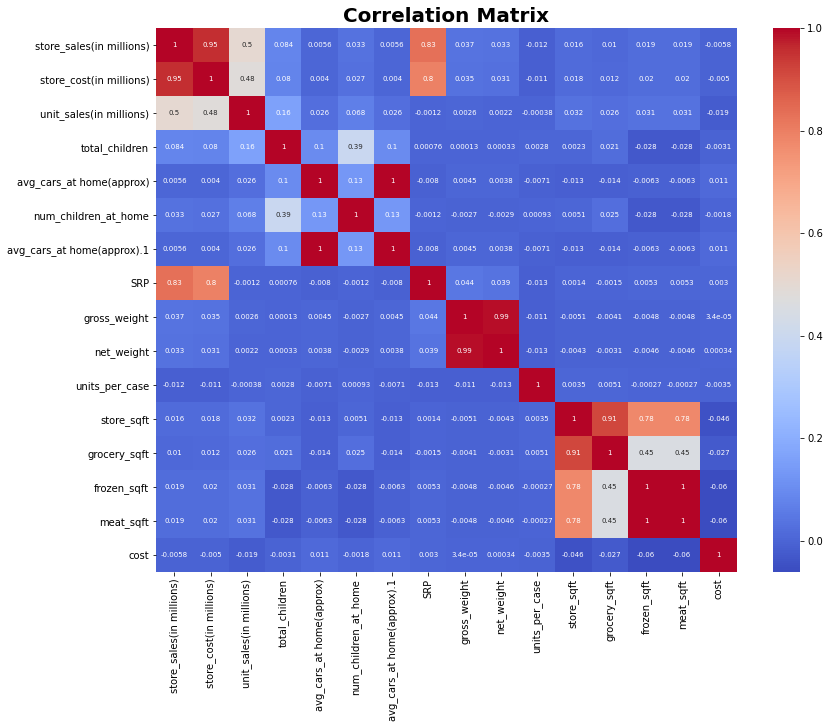

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

# Feature Engineering

According to the correlation matrix, we will do feature engineering to preserve as much data as possible at this stage while not facing multicollinearity.

In [7]:
df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
df_woOut['meat_to_total_ratio'] = df_woOut['meat_sqft'] / df_woOut['store_sqft']

<ipython-input-7-dd7f76fe2813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
<ipython-input-7-dd7f76fe2813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
<ipython-input-7-dd7f76fe2813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [8]:
df_woOut = df_woOut.drop(['store_sales(in millions)', 'store_cost(in millions)', 'frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
                          'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

In [9]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_woOut.columns:
    uni_len = len(set(df_woOut[c]))
    dtype = df_woOut[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: float64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: float64 	 Column name: total_children
Number of unique values: 5 	 Datatype: float64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: float64 	 Column name: num_children_at_home


Text(0.5, 1.0, 'Correlation Matrix')

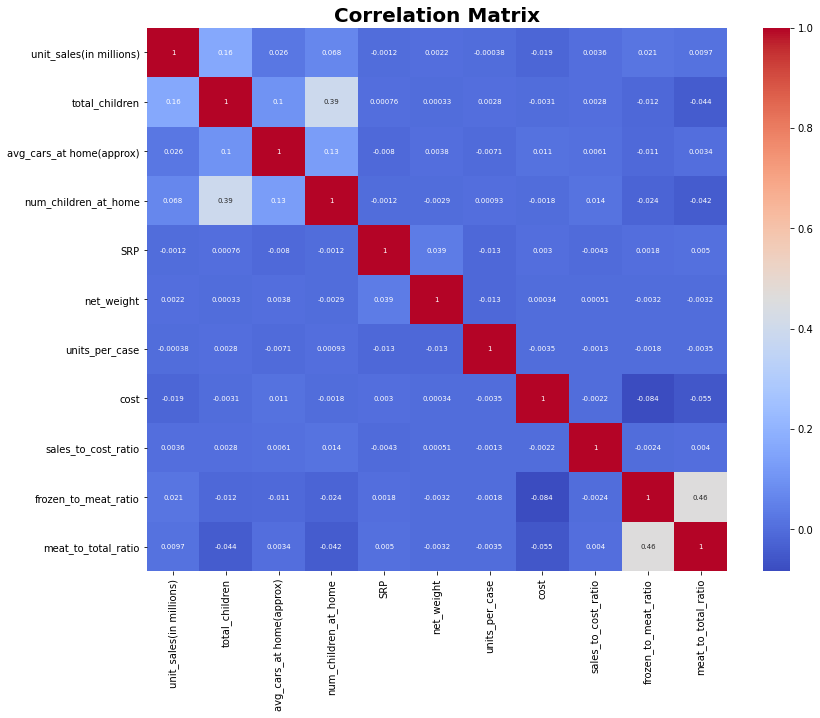

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

In [10]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
MinMax_scaled = min_max_scaler.fit_transform(df_woOut[cols])

MinMax_scaled

array([[ 0.2       , -0.6       , -0.5       , ...,  0.05405405,
         0.11000332,  0.26845737],
       [-0.2       , -1.        ,  1.        , ..., -0.80851064,
         0.11000332,  0.26845737],
       [-0.6       ,  0.6       , -0.5       , ...,  0.05405405,
         0.11000332,  0.26845737],
       ...,
       [-0.6       , -0.6       ,  0.5       , ..., -0.73913043,
        -0.4091355 ,  0.19257961],
       [-0.2       , -0.2       ,  1.        , ...,  0.83870968,
         0.64177236, -0.98319777],
       [ 0.2       ,  0.2       , -0.5       , ..., -0.73913043,
         0.64177236, -0.98319777]])

In [11]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_woOut[cols])
std_scaled

array([[ 1.09602519, -1.03128914, -1.08330242, ...,  0.39259738,
        -0.01604716,  0.18363349],
       [-0.11019699, -1.70201487,  1.61780374, ..., -1.11761199,
        -0.01604716,  0.18363349],
       [-1.31641916,  0.98088805, -1.08330242, ...,  0.39259738,
        -0.01604716,  0.18363349],
       ...,
       [-1.31641916, -1.03128914,  0.71743502, ..., -0.99613863,
        -0.97003583,  0.05803928],
       [-0.11019699, -0.36056341,  1.61780374, ...,  1.76640074,
         0.96115125, -1.88812817],
       [ 1.09602519,  0.31016232, -1.08330242, ..., -0.99613863,
         0.96115125, -1.88812817]])

In [12]:
#df = pd.DataFrame(std_scaled, columns = [c for c in num_cols if c != 'cost'])
df = pd.DataFrame(MinMax_scaled, columns = [c for c in num_cols if c != 'cost'])

# Concatenate standardized/normalized numerical columns with the others
df = pd.concat([df.reset_index(drop=True), 
                df_woOut[cate_cols + pre_dum_cols].reset_index(drop=True)], axis=1)

### Dropping irrelevant attributes

We will drop irrelevant attributes or attributes that have too many variables to avoid over-complicating our model.

In [13]:
df = df.drop(['food_category', 'food_department', 'brand_name', 'store_city', 'promotion_name'], axis = 1)

### Dummifying categorical variables



Since 'media_type' will be our treatment for the causal inference, we encode it differently not to add too many features/predictors to our model.

In [14]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit_transform(df['media_type'].tolist())

# to decode values 
# label_encoder.inverse_transform([1, 1, 0])

df['media_type_labeled'] = label_encoder.fit_transform(df['media_type'].tolist())

In [15]:
# Dummify categorical variables except for 'media type'
df = pd.get_dummies(df[[c for c in df.columns if c != 'media_type']], drop_first = True)

In [16]:
df

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,units_per_case,sales_to_cost_ratio,frozen_to_meat_ratio,meat_to_total_ratio,...,store_type_Supermarket,store_state_CA,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas
0,0.2,-0.6,-0.5,-0.6,-0.229885,0.650704,-0.085714,0.054054,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
1,-0.2,-1.0,1.0,-1.0,-0.229885,0.650704,-0.085714,-0.808511,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
2,-0.6,0.6,-0.5,-1.0,-0.229885,0.650704,-0.085714,0.054054,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
3,-0.6,-0.2,0.0,-0.2,-0.229885,0.650704,-0.085714,0.687500,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
4,0.2,0.6,0.0,-1.0,-0.505747,-0.767887,0.600000,-0.808511,0.110003,0.268457,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57418,-1.0,-0.6,-0.5,-0.6,0.298851,0.752113,0.428571,-0.875000,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57419,-1.0,-0.2,0.0,-1.0,-0.367816,0.380282,1.000000,0.838710,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57420,-0.6,-0.6,0.5,-1.0,0.298851,0.752113,0.428571,-0.739130,-0.409135,0.192580,...,0,1,0,0,0,0,0,0,0,0
57421,-0.2,-0.2,1.0,-1.0,0.298851,0.752113,0.428571,0.838710,0.641772,-0.983198,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y = df_woOut['cost']

In [18]:
X_final = df[['media_type_labeled', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'total_children', 'avg_cars_at home(approx)', 'meat_to_total_ratio',
              'num_children_at_home', 'unit_sales(in millions)', 'gender_M', 'houseowner_Y']]

# Model Development

In [19]:
from sklearn.model_selection import train_test_split
X_train_final, X_test_final, y_train, y_test = train_test_split(X_final, y, test_size = 0.3, random_state = 0)

## Baseline Model

In [37]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
base_model = dr.fit(X_train_final, y_train)
y_test_pred_base = base_model.predict(X_test_final)

In [38]:
from sklearn.metrics import mean_squared_error
base_mse = mean_squared_error(y_test, y_test_pred_base, squared=False)
base_mse

28.73026641116157

## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_lr_final = lr.fit(X_train_final,y_train)
y_test_pred = model_lr_final.predict(X_test_final)

In [40]:
lr_mse = mean_squared_error(y_test, y_test_pred, squared=False)
lr_mse

28.690971996437348

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0, max_features = 10, max_depth = 5)
model_dt_final = dt.fit(X_train_final, y_train)
y_test_pred_final = model_dt_final.predict(X_test_final)

In [42]:
decisiontree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
decisiontree_pred_mse

26.619336508695465

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(random_state = 0, max_features = 10, n_estimators = 1000)
model_rf_final = randomforest.fit(X_train_final, y_train)
y_test_pred_final = model_rf_final.predict(X_test_final)

In [44]:
randomforest_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
randomforest_pred_mse

18.021941468542185

## Extra Tree

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
extratree = ExtraTreesRegressor(random_state = 0, max_features = 10, n_estimators = 1000)
model_et_final = extratree.fit(X_train_final, y_train)
y_test_pred_final = model_et_final.predict(X_test_final)

In [46]:
extratree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
extratree_pred_mse

15.552651439528221

## AdaBoost

In [47]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), random_state = 0, n_estimators = 1000)
model_ab_final = adaboost.fit(X_train_final, y_train)
y_test_pred_final = model_ab_final.predict(X_test_final)

In [48]:
adaboost_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
adaboost_pred_mse

25.38369080992926

## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(max_depth=5, n_estimators=1000, max_features = 10)
model_gb_final = gb.fit(X_train_final, y_train)
y_test_pred_final = model_gb_final.predict(X_test_final)

In [50]:
gb_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
gb_pred_mse

19.7053145641623

## LightGBM

In [51]:
import lightgbm as ltb
lgbm = ltb.LGBMRegressor()
model_lgbm_final = lgbm.fit(X_train_final,y_train)
y_test_pred = model_lgbm_final.predict(X_test_final)

In [54]:
lgbm_mse = mean_squared_error(y_test, y_test_pred, squared=False)
lgbm_mse

20.072371274299034

## Artificial Neural Network

In [58]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(hidden_layer_sizes = (20), max_iter = 2000, random_state = 0)
model_ann_final = ann.fit(X_train_final, y_train)
y_test_pred_final = model_ann_final.predict(X_test_final)

In [59]:
ann_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
ann_pred_mse

28.28242429228561

## Model Selection and Cross Validation

According to the results, the Extra Tree model performs the best since it has the lowest MSE. Therefore, we will chose it as our final model and do cross-validation.

In [60]:
final_model = model_et_final

In [62]:
# According to the size of our dataset, we will divide it to 10 folds for cross-validation
from sklearn.model_selection import cross_val_score
final_model.fit(X_train_final, y_train)
et_mses = -cross_val_score(final_model, X_test_final, y_test, scoring="neg_root_mean_squared_error", cv=10)

In [64]:
pd.Series(et_mses).describe()

count    10.000000
mean     18.260835
std       0.545241
min      17.626331
25%      17.808020
50%      18.206255
75%      18.767677
max      18.988023
dtype: float64

In [63]:
final_model.fit(X_train_final, y_train)
final_predictions = final_model.predict(X_test_final)
final_mse = mean_squared_error(y_test, final_predictions, squared=False)
final_mse

15.552651439528221